In [1]:
import sys
import numpy as np
import pandas as pd

sys.path.insert(0, '..')
from scripts import sanity_check

### load data

In [2]:
inpatient_data = pd.read_csv('../../data/Train_Inpatientdata-1542865627584.csv')
outpatient_data = pd.read_csv('../../data/Train_Outpatientdata-1542865627584.csv')
beneficiary_data = pd.read_csv('../../data/Train_Beneficiarydata-1542865627584.csv')

In [3]:
checker_in = sanity_check.SanityCheck(inpatient_data)
checker_out = sanity_check.SanityCheck(outpatient_data)
checker_ben = sanity_check.SanityCheck(beneficiary_data)

In [4]:
inpatient_data.shape[0], outpatient_data.shape[0], beneficiary_data.shape[0]

(40474, 517737, 138556)

In [5]:
inpatient_data['Provider'].nunique(), outpatient_data['Provider'].nunique()

(2092, 5012)

In [6]:
len(set(inpatient_data['Provider'].values).union(set(outpatient_data['Provider'].values)))

5410

**reasoning the missing values**

<Figure size 3600x1800 with 0 Axes>

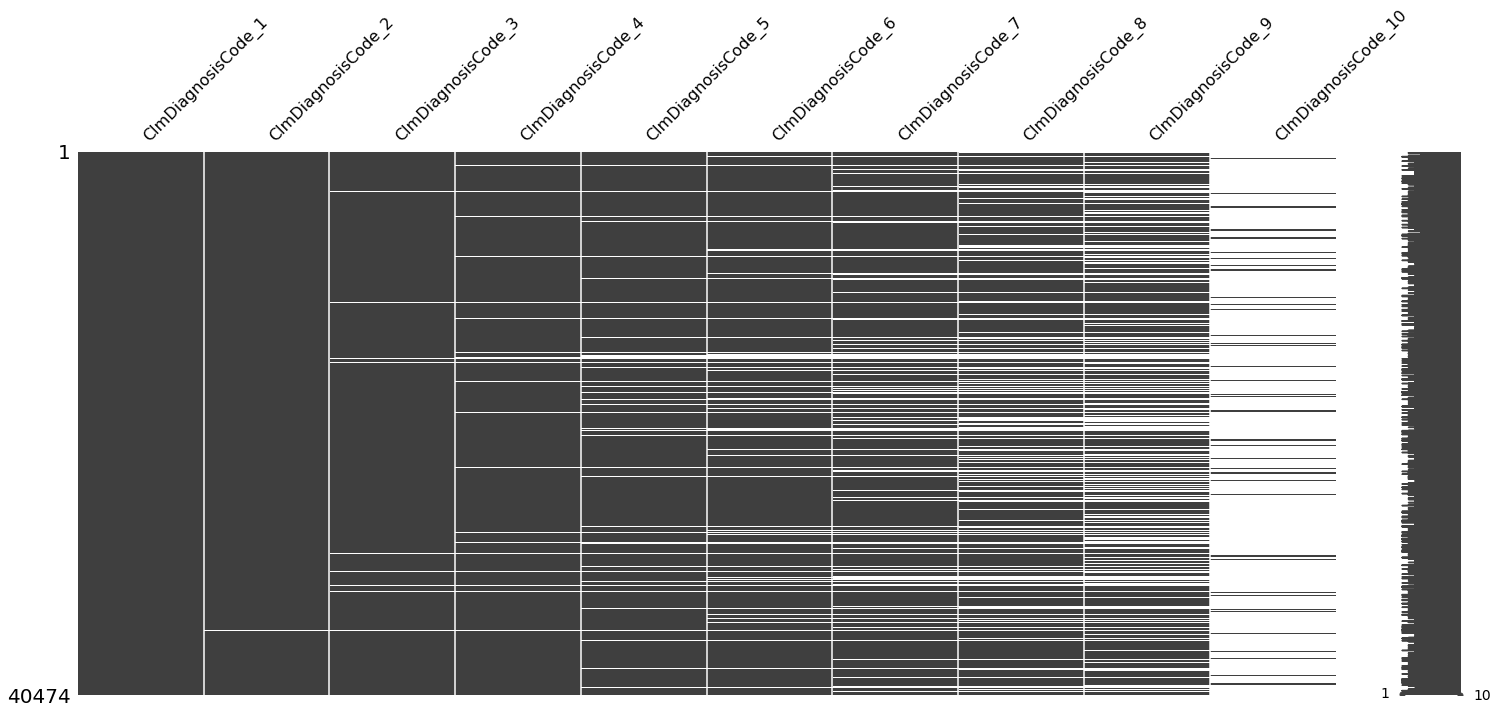

In [7]:
checker_in.render_missing_matrix(['ClmDiagnosisCode_1',
                                  'ClmDiagnosisCode_2',
                                  'ClmDiagnosisCode_3',
                                  'ClmDiagnosisCode_4',
                                  'ClmDiagnosisCode_5',
                                  'ClmDiagnosisCode_6',
                                  'ClmDiagnosisCode_7',
                                  'ClmDiagnosisCode_8',
                                  'ClmDiagnosisCode_9',
                                  'ClmDiagnosisCode_10',
                                  ])

<Figure size 3600x1800 with 0 Axes>

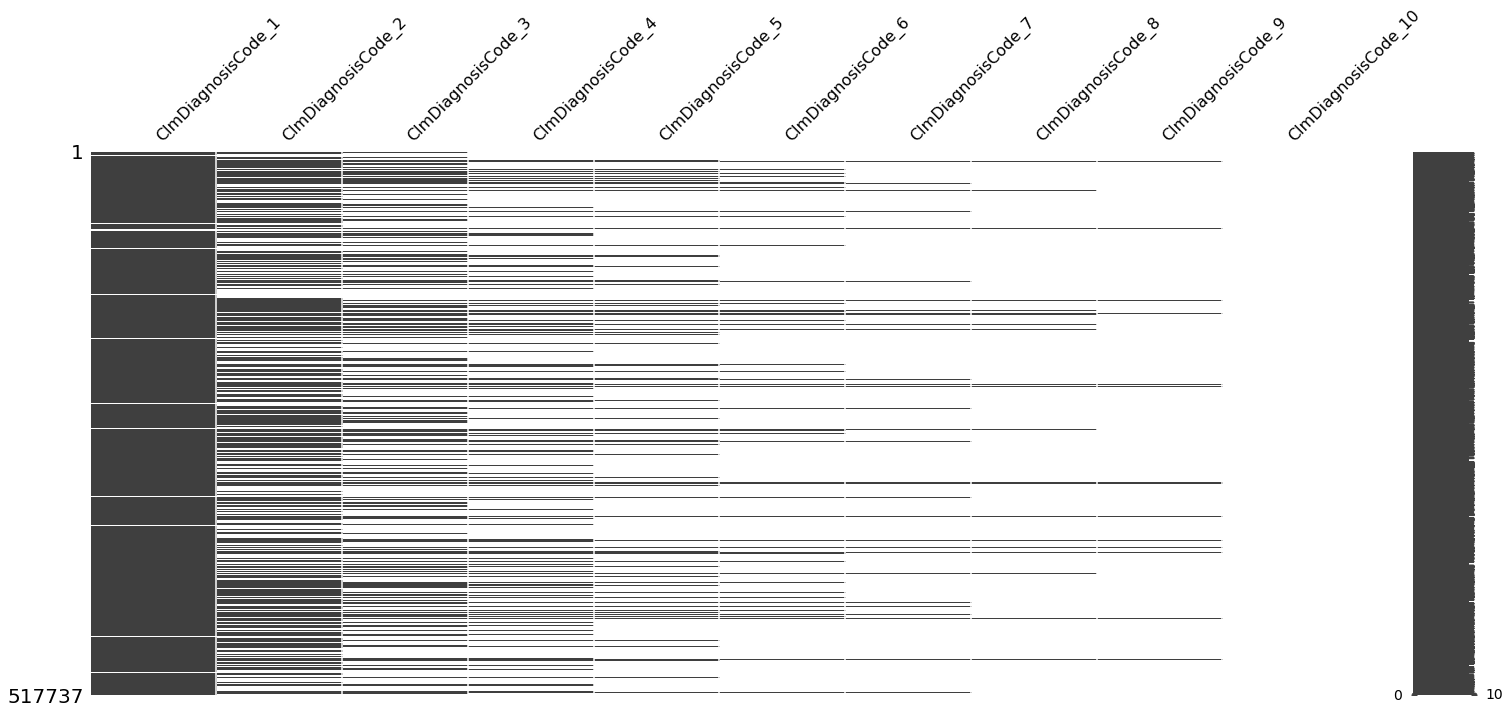

In [16]:
checker_out.render_missing_matrix(['ClmDiagnosisCode_1',
                                  'ClmDiagnosisCode_2',
                                  'ClmDiagnosisCode_3',
                                  'ClmDiagnosisCode_4',
                                  'ClmDiagnosisCode_5',
                                  'ClmDiagnosisCode_6',
                                  'ClmDiagnosisCode_7',
                                  'ClmDiagnosisCode_8',
                                  'ClmDiagnosisCode_9',
                                  'ClmDiagnosisCode_10',
                                  ])

<Figure size 3600x1800 with 0 Axes>

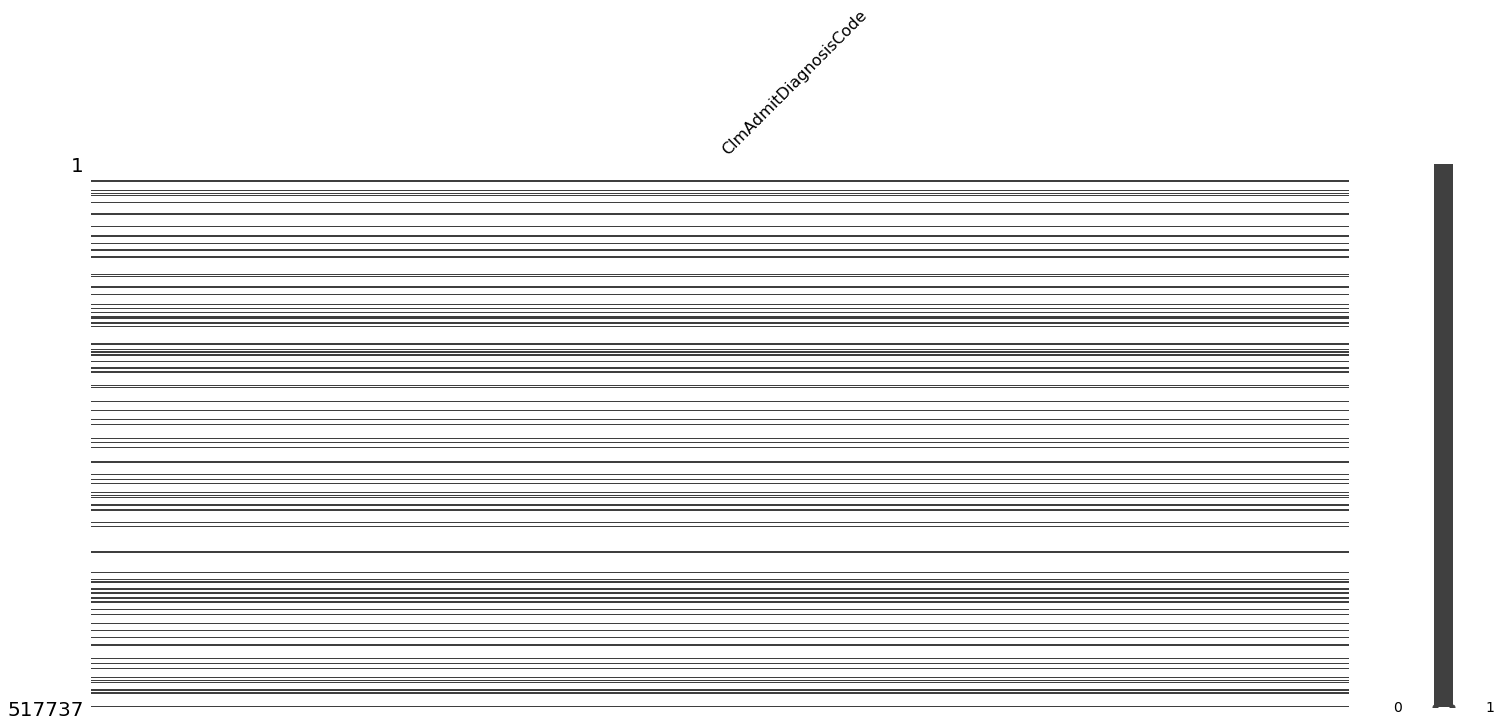

In [18]:
checker_out.render_missing_matrix(['ClmAdmitDiagnosisCode'])

In [8]:
inpatient_data[['ClmDiagnosisCode_1',
                'ClmDiagnosisCode_2',
                'ClmDiagnosisCode_3',
                'ClmDiagnosisCode_4',
                'ClmDiagnosisCode_5',
                'ClmDiagnosisCode_6',
                'ClmDiagnosisCode_7',
                'ClmDiagnosisCode_8',
                'ClmDiagnosisCode_9',
                'ClmDiagnosisCode_10',
                ]].dtypes

ClmDiagnosisCode_1     object
ClmDiagnosisCode_2     object
ClmDiagnosisCode_3     object
ClmDiagnosisCode_4     object
ClmDiagnosisCode_5     object
ClmDiagnosisCode_6     object
ClmDiagnosisCode_7     object
ClmDiagnosisCode_8     object
ClmDiagnosisCode_9     object
ClmDiagnosisCode_10    object
dtype: object

claim diagnosis code missing because it didn't exist. can replace with arbitrary value.
`ClmAdmitDiagnosisCode` values missing because only few of all out patients has to admited.

In [9]:
inpatient_data[['ClmProcedureCode_1',
                'ClmProcedureCode_2',
                'ClmProcedureCode_3',
                'ClmProcedureCode_4',
                'ClmProcedureCode_5',
                'ClmProcedureCode_6'
                ]].dtypes

ClmProcedureCode_1    float64
ClmProcedureCode_2    float64
ClmProcedureCode_3    float64
ClmProcedureCode_4    float64
ClmProcedureCode_5    float64
ClmProcedureCode_6    float64
dtype: object

<Figure size 3600x1800 with 0 Axes>

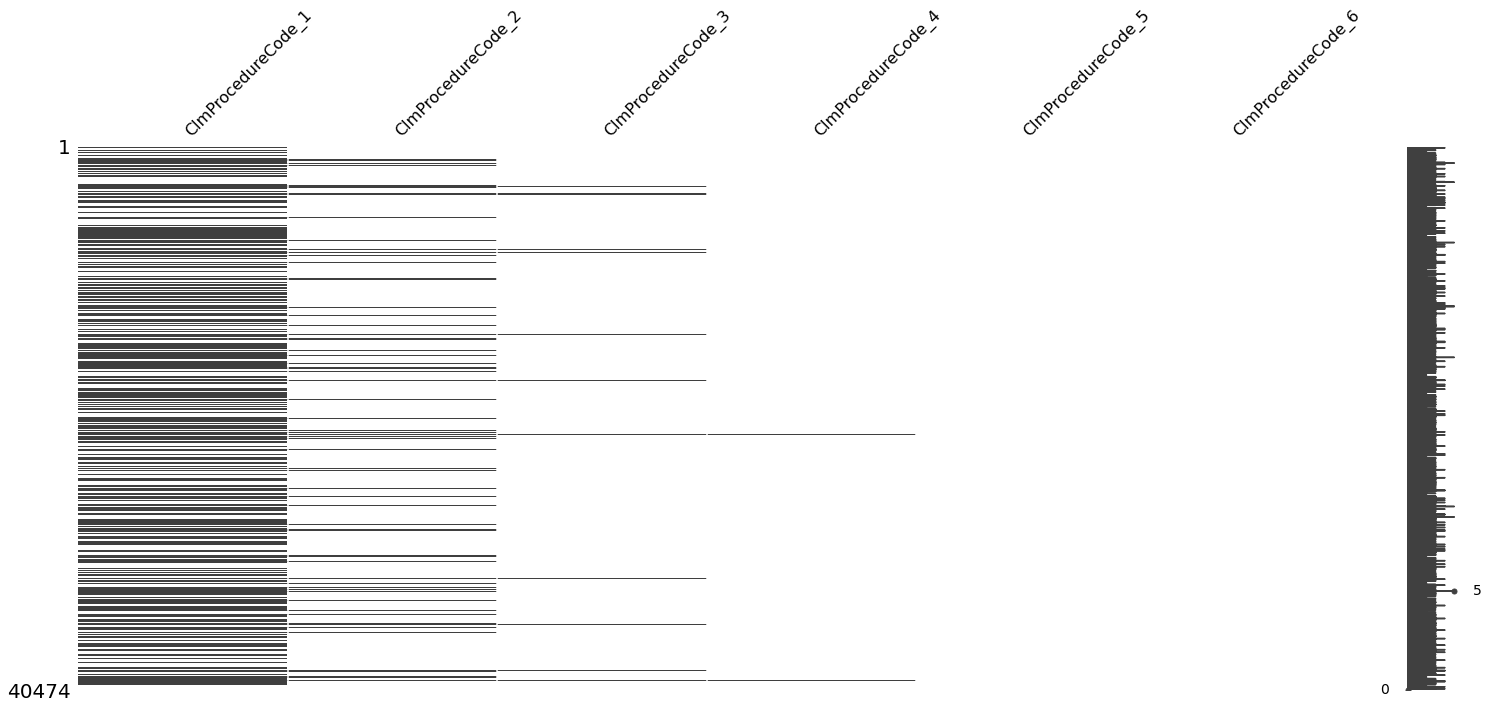

In [10]:
checker_in.render_missing_matrix(['ClmProcedureCode_1',
                                  'ClmProcedureCode_2',
                                  'ClmProcedureCode_3',
                                  'ClmProcedureCode_4',
                                  'ClmProcedureCode_5',
                                  'ClmProcedureCode_6'
                                  ])

<Figure size 3600x1800 with 0 Axes>

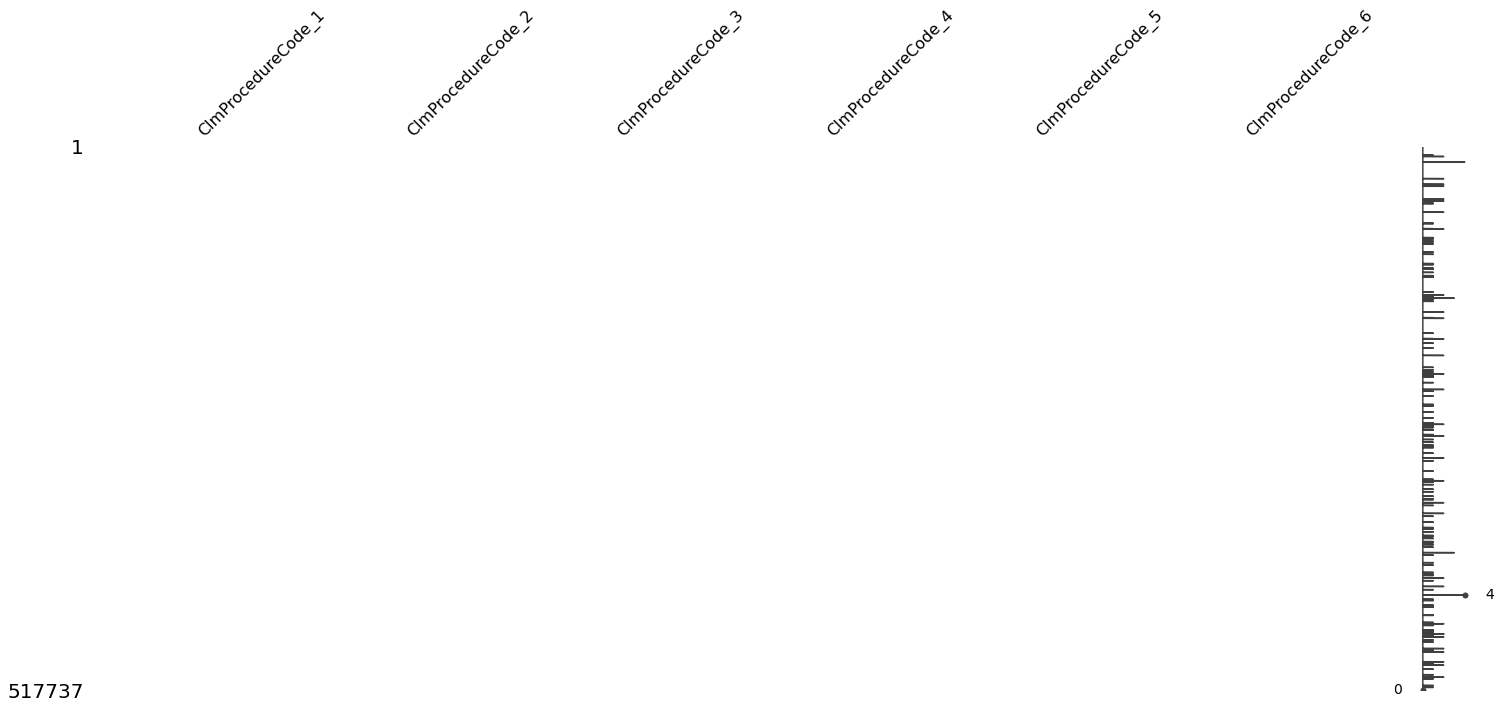

In [15]:
checker_out.render_missing_matrix(['ClmProcedureCode_1',
                                  'ClmProcedureCode_2',
                                  'ClmProcedureCode_3',
                                  'ClmProcedureCode_4',
                                  'ClmProcedureCode_5',
                                  'ClmProcedureCode_6'
                                  ])

In [11]:
checker_in.cardinality(feature='ClmProcedureCode_1')

9904.0    1137
8154.0    1021
66.0       893
3893.0     849
3995.0     805
          ... 
8136.0       1
4401.0       1
4942.0       1
3888.0       1
4492.0       1
Name: ClmProcedureCode_1, Length: 1117, dtype: int64

claim procedure code missing because it didn't exist. can replace with arbitrary value.
missing amount in `DeductibleAmtPaid` is 2% any imputaion technique can be applied.

In [12]:
inpatient_data[['AttendingPhysician',
                'OperatingPhysician',
                'OtherPhysician']].dtypes

AttendingPhysician    object
OperatingPhysician    object
OtherPhysician        object
dtype: object

<Figure size 3600x1800 with 0 Axes>

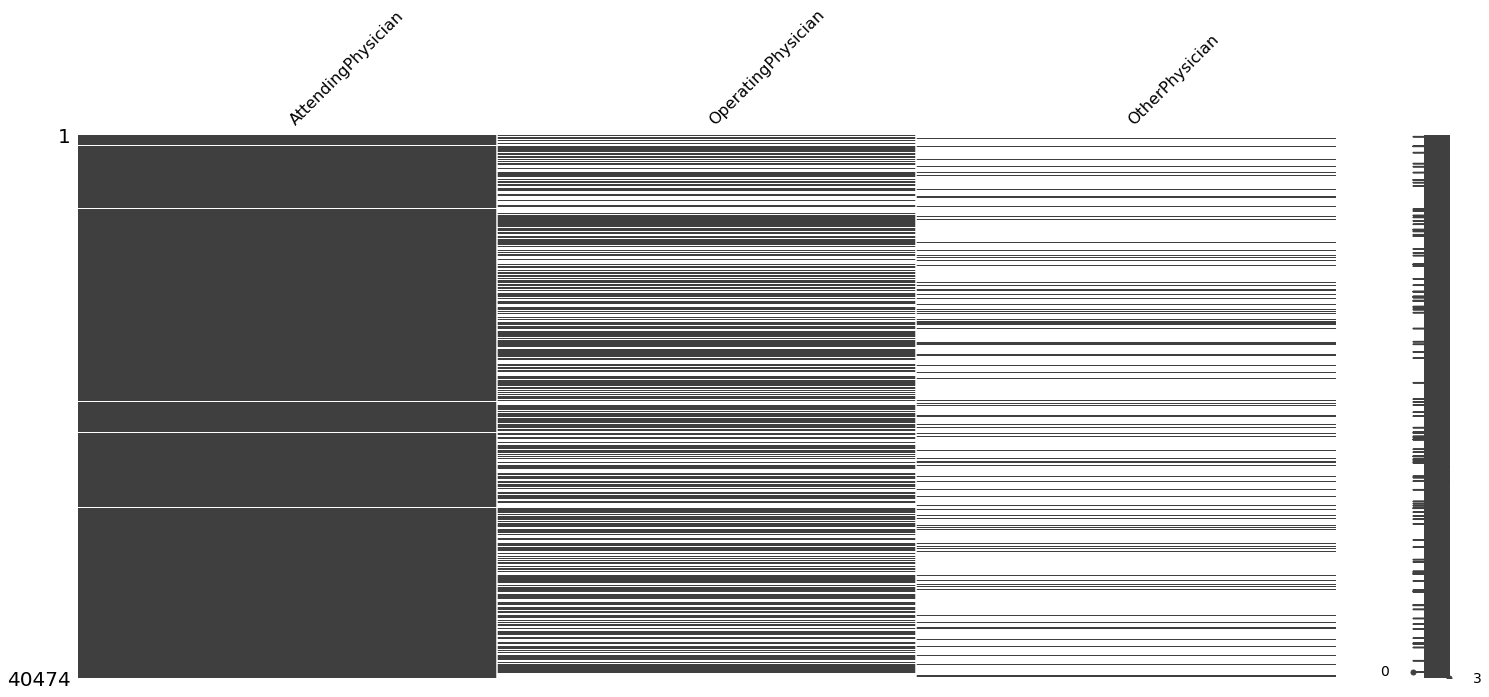

In [13]:
checker_in.render_missing_matrix(['AttendingPhysician',
                                  'OperatingPhysician',
                                  'OtherPhysician'])

<Figure size 3600x1800 with 0 Axes>

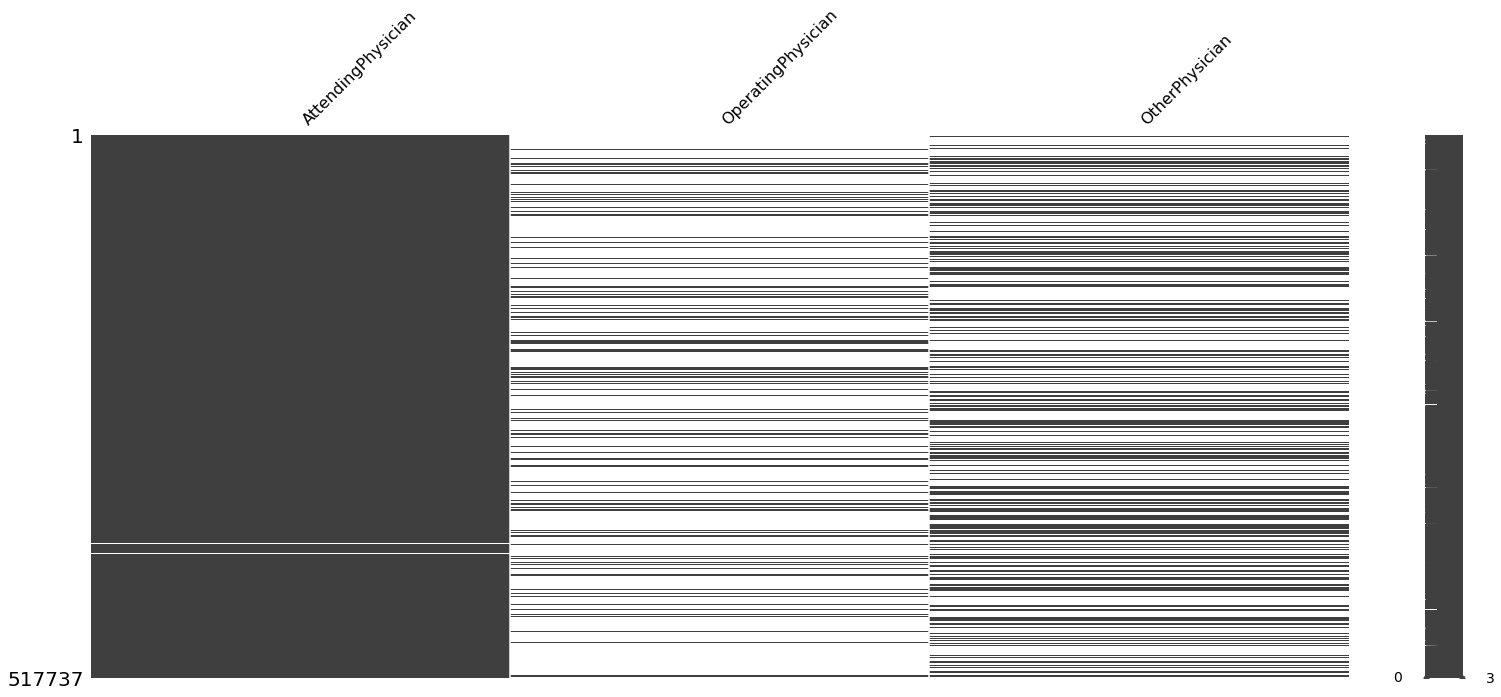

In [14]:
checker_out.render_missing_matrix(['AttendingPhysician',
                                  'OperatingPhysician',
                                  'OtherPhysician'])

`OperatingPhysician` and `OtherPhysician` missing maybe they not exist for that record
but `AttendingPhysician` missing values should be imputed!